In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold


In [35]:
np.random.seed(0) #for reproducibility, making sure the same random numbers are initialized. 

In [36]:
#dogs: higher flappy index, lower whisker length 
dogs_whisker_length = np.random.normal(loc=5, scale = 1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale = 1, size=10)

In [37]:
#cats: lower ear flappy, higher whisker length 
cats_whisker_length = np.random.normal(loc=8, scale = 1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale = 1, size=10)

In [38]:
# prepare data for algorithm, putting the data into x and y coordinates by stacking the data together. Combining  data
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))


In [39]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [40]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [41]:
data

array([[ 6.76405235,  8.14404357],
       [ 5.40015721,  9.45427351],
       [ 5.97873798,  8.76103773],
       [ 7.2408932 ,  8.12167502],
       [ 6.86755799,  8.44386323],
       [ 4.02272212,  8.33367433],
       [ 5.95008842,  9.49407907],
       [ 4.84864279,  7.79484174],
       [ 4.89678115,  8.3130677 ],
       [ 5.4105985 ,  7.14590426],
       [ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [42]:
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data))))

In [43]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [44]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state =42)

In [45]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

In [46]:
X_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

<function matplotlib.pyplot.show(close=None, block=None)>

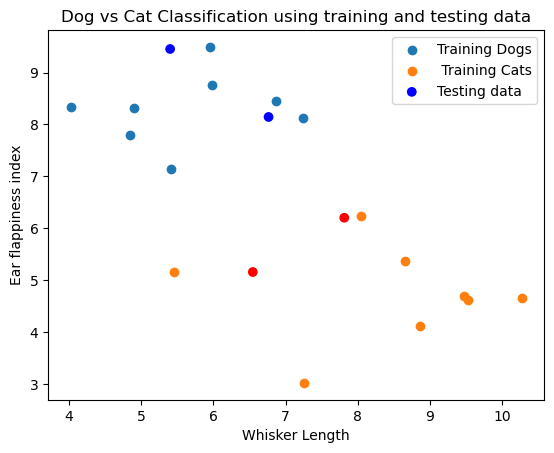

In [47]:
#plot the training and test data
plt.scatter(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], label='Training Dogs') 
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train ==1][:,1], label =' Training Cats')
plt.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap ='bwr', label = 'Testing data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear flappiness index')
plt.title('Dog vs Cat Classification using training and testing data')
plt.legend()
plt.show



In [48]:
#implementing random linear classifier algorithm
def random_linear_classifier(data_dogs,data_cats,k,d):
    # d is the number of features 
    best_error = float('inf')
    best_theta = None
    best_theta0 = None 
    
    for _ in range (k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
        
        error = compute_error(data_dogs,data_cats,theta,theta0)
        
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    return best_theta, best_theta0        
        

In [49]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0: # hypothesis 
            error += 1
    for x_cat in data_cats:  
        if np.dot(theta, x_cat) + theta0 > 0: # hypothesis
            error += 1
    return error             
    

In [53]:
# Define function for k-fold cross validation 

def cross_validate(data_dogs, data_cats, k_values, d, n_splits = 5):
    kf = KFold(n_splits=n_splits, shuffle= True, random_state = 42)
    avg_errors = []
    
    for k in k_values:
        errors = []
        
        for train_index, val_index in kf.split(data_dogs, data_cats):
            X_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))
            
            best_theta_fold, best_theta0_fold = random_linear_classifier(X_train_fold[y_train_fold == 0], X_train_fold[y_train_fold == 1], k, d)
            errors.append(compute_error(X_val_fold[y_val_fold == 0], X_val_fold[y_val_fold == 1], best_theta_fold, best_theta0_fold))
        avg_errors.append(np.mean(errors))
    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# Defining k values 

k_values = [1, 10, 50, 100, 200, 300, 350]

best_k = cross_validate(dogs_data, cats_data, k_values, d = 2)

print(f"Best value of k: {best_k}")

Best value of k: 100


In [54]:
# Run random linear classifier algorithm 
k = 100 #number of iteration 
d = 2 # number of features 
best_theta, best_theta0 = random_linear_classifier(dogs_data, cats_data, k, d)

In [56]:
# plot the decision boundary
x_vals = np.linspace(2, 10, 100) 
y_vals = (-best_theta[0]/best_theta[1])* x_vals - (best_theta0 / best_theta[1])

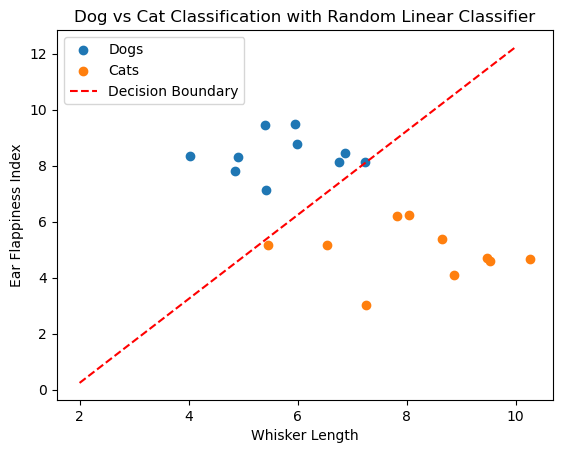

In [57]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label = 'Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label ='Cats')
plt.plot(x_vals, y_vals, color = 'red', linestyle ='--', label = 'Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()
